# IMPORTING TENSORFLOW


In [1]:
!pip install tensorflow

# IMPORTING TENSORFLOW

In [2]:
import tensorflow as tf

# USING CPU


In [3]:
device = "/device:CPU:0"

# DATA IMPORTING 

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "Smart-Garbage-Segregation/Data"

classes = os.listdir(dir_example)
print(classes)

['Test', 'Train']


In [6]:
dir_example = "Smart-Garbage-Segregation/Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['paper', 'metal', 'cardboard', 'trash', 'glass', 'plastic']


# DATA VISUALIZATION

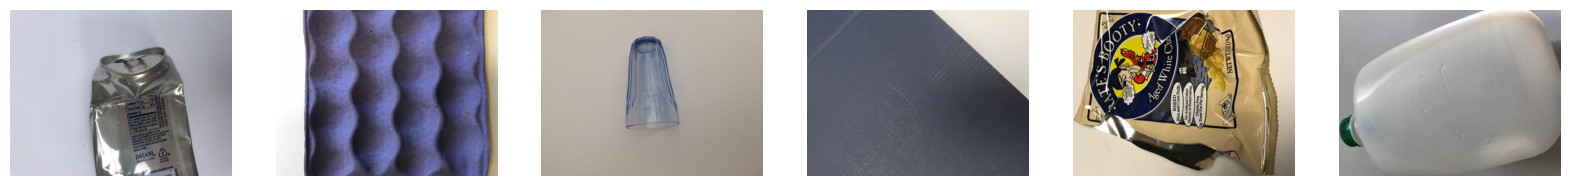

In [9]:
dir_with_examples = 'Smart-Garbage-Segregation/visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PREPARING OF DATA 

In [11]:
train = 'Smart-Garbage-Segregation/Data/Train'
test = 'Smart-Garbage-Segregation/Data/Test'

In [12]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2186 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [13]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [14]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 343 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


# Importing oneDNN 

In [16]:

# oneDNN is integrated into TensorFlow, no separate import needed
# Enable oneDNN optimizations through environment variable
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'



# LABELING 

In [17]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# CREATING MODEL WITH oneDNN OPTIMIZATION 

In [18]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))





/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# COMPILING MODEL  # Enable OneDNN optimizations

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,803,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,843,910 (10.85 MB)

 Trainable params: 2,843,910 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING THE MODEL(100 EPOCHS)

In [36]:
model.fit(train_generator,
          epochs=100,
          steps_per_epoch=2184//32)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 57s 840ms/step - accuracy: 0.5768 - loss: 1.0996
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 180us/step - accuracy: 0.6875 - loss: 0.9820 
Epoch 3/100


2025-10-12 18:50:18.113538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 59s 863ms/step - accuracy: 0.6114 - loss: 1.0087
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 71us/step - accuracy: 0.5625 - loss: 1.4838  
Epoch 5/100


2025-10-12 18:51:18.254077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 61s 896ms/step - accuracy: 0.6426 - loss: 0.9347
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 55us/step - accuracy: 0.7188 - loss: 0.7489   
Epoch 7/100


2025-10-12 18:52:20.637989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 61s 882ms/step - accuracy: 0.7015 - loss: 0.8304
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 61us/step - accuracy: 0.7812 - loss: 0.7815  
Epoch 9/100


2025-10-12 18:53:22.164097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 61s 895ms/step - accuracy: 0.7217 - loss: 0.7463
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 58us/step - accuracy: 0.5312 - loss: 1.5947  
Epoch 11/100


2025-10-12 18:54:24.312727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 68s 992ms/step - accuracy: 0.7968 - loss: 0.5885
Epoch 12/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 108us/step - accuracy: 0.8438 - loss: 0.6055
Epoch 13/100


2025-10-12 18:55:33.233087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8064 - loss: 0.5207
Epoch 14/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 138us/step - accuracy: 0.6875 - loss: 0.8029  
Epoch 15/100


2025-10-12 18:56:43.413652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 66s 959ms/step - accuracy: 0.8511 - loss: 0.4627
Epoch 16/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 200us/step - accuracy: 0.7812 - loss: 0.4141
Epoch 17/100


2025-10-12 18:57:50.433485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 63s 914ms/step - accuracy: 0.8594 - loss: 0.4059
Epoch 18/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 60us/step - accuracy: 0.8438 - loss: 0.5215  
Epoch 19/100


2025-10-12 18:58:54.342976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 64s 935ms/step - accuracy: 0.8868 - loss: 0.3121
Epoch 20/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 66us/step - accuracy: 0.9375 - loss: 0.3287   
Epoch 21/100


2025-10-12 18:59:59.245023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 68s 989ms/step - accuracy: 0.9058 - loss: 0.2752
Epoch 22/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 218us/step - accuracy: 0.8125 - loss: 0.7792 
Epoch 23/100


2025-10-12 19:01:07.817533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 65s 948ms/step - accuracy: 0.8964 - loss: 0.3696
Epoch 24/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.9375 - loss: 0.3626  
Epoch 25/100


2025-10-12 19:02:13.599427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9170 - loss: 0.2370
Epoch 26/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 198us/step - accuracy: 1.0000 - loss: 0.0776
Epoch 27/100


2025-10-12 19:03:34.913188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9208 - loss: 0.2093
Epoch 28/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 62us/step - accuracy: 0.9062 - loss: 0.2294   
Epoch 29/100


2025-10-12 19:04:45.777816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9293 - loss: 0.2116
Epoch 30/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step - accuracy: 0.9375 - loss: 0.2060
Epoch 31/100


2025-10-12 19:06:02.795309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9305 - loss: 0.2138
Epoch 32/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 74us/step - accuracy: 0.9688 - loss: 0.1176
Epoch 33/100


2025-10-12 19:07:18.771221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9470 - loss: 0.1727
Epoch 34/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 255us/step - accuracy: 0.9688 - loss: 0.2122
Epoch 35/100


2025-10-12 19:08:39.582228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9454 - loss: 0.1631
Epoch 36/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 68us/step - accuracy: 0.9375 - loss: 0.2751
Epoch 37/100


2025-10-12 19:09:50.818099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9521 - loss: 0.1606
Epoch 38/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 123us/step - accuracy: 1.0000 - loss: 0.0527  
Epoch 39/100


2025-10-12 19:11:13.537981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9360 - loss: 0.1779
Epoch 40/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 80us/step - accuracy: 0.9375 - loss: 0.1286  
Epoch 41/100


2025-10-12 19:12:24.474952: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9543 - loss: 0.1436
Epoch 42/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.9062 - loss: 0.3921
Epoch 43/100


2025-10-12 19:13:39.493033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9538 - loss: 0.1652
Epoch 44/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 95us/step - accuracy: 0.9688 - loss: 0.2080   
Epoch 45/100


2025-10-12 19:14:58.716267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9632 - loss: 0.1076
Epoch 46/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 261us/step - accuracy: 0.9375 - loss: 0.1528
Epoch 47/100


2025-10-12 19:16:12.785321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.9598 - loss: 0.1288
Epoch 48/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 1.0000 - loss: 0.0392 
Epoch 49/100


2025-10-12 19:17:26.799493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 66s 960ms/step - accuracy: 0.9606 - loss: 0.0992
Epoch 50/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 70us/step - accuracy: 0.9688 - loss: 0.0904
Epoch 51/100


2025-10-12 19:18:33.818897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9609 - loss: 0.1125
Epoch 52/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - accuracy: 0.9688 - loss: 0.1332
Epoch 53/100


2025-10-12 19:20:06.381024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9790 - loss: 0.0781
Epoch 54/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0441    
Epoch 55/100


2025-10-12 19:21:28.304331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9549 - loss: 0.1417
Epoch 56/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 88us/step - accuracy: 0.9688 - loss: 0.1853
Epoch 57/100


2025-10-12 19:22:38.676236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9329 - loss: 0.1772
Epoch 58/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 71us/step - accuracy: 0.9375 - loss: 0.0771   
Epoch 59/100


2025-10-12 19:23:53.491948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.9639 - loss: 0.1152
Epoch 60/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 145us/step - accuracy: 0.9688 - loss: 0.0760 
Epoch 61/100


2025-10-12 19:25:09.118931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 63s 923ms/step - accuracy: 0.9557 - loss: 0.1092
Epoch 62/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 87us/step - accuracy: 0.9688 - loss: 0.3460  
Epoch 63/100


2025-10-12 19:26:13.323157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9682 - loss: 0.1050
Epoch 64/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 81us/step - accuracy: 0.9688 - loss: 0.3938   
Epoch 65/100


2025-10-12 19:27:24.945964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 67s 969ms/step - accuracy: 0.9732 - loss: 0.0876
Epoch 66/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 93us/step - accuracy: 0.9062 - loss: 0.1417  
Epoch 67/100


2025-10-12 19:28:32.337629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 63s 919ms/step - accuracy: 0.9713 - loss: 0.0762
Epoch 68/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 75us/step - accuracy: 0.9375 - loss: 0.1086   
Epoch 69/100


2025-10-12 19:29:36.385497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 65s 946ms/step - accuracy: 0.9746 - loss: 0.0694
Epoch 70/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 78us/step - accuracy: 1.0000 - loss: 0.0113   
Epoch 71/100


2025-10-12 19:30:42.341036: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 65s 948ms/step - accuracy: 0.9779 - loss: 0.0707
Epoch 72/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 82us/step - accuracy: 0.9688 - loss: 0.0808   
Epoch 73/100


2025-10-12 19:31:48.417589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 65s 952ms/step - accuracy: 0.9776 - loss: 0.0764
Epoch 74/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 89us/step - accuracy: 1.0000 - loss: 0.0243   
Epoch 75/100


2025-10-12 19:32:54.754867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 67s 971ms/step - accuracy: 0.9714 - loss: 0.0760
Epoch 76/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 116us/step - accuracy: 1.0000 - loss: 0.0333  
Epoch 77/100


2025-10-12 19:34:02.456975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 65s 949ms/step - accuracy: 0.9725 - loss: 0.0797
Epoch 78/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 81us/step - accuracy: 0.9062 - loss: 0.1451   
Epoch 79/100


2025-10-12 19:35:08.653041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9753 - loss: 0.0859
Epoch 80/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.2572    
Epoch 81/100


2025-10-12 19:36:20.944500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9708 - loss: 0.1030
Epoch 82/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.9688 - loss: 0.2274
Epoch 83/100


2025-10-12 19:37:33.268460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9769 - loss: 0.0682
Epoch 84/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 76us/step - accuracy: 1.0000 - loss: 0.0259   
Epoch 85/100


2025-10-12 19:38:50.843703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9861 - loss: 0.0543
Epoch 86/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 89us/step - accuracy: 0.9375 - loss: 0.0932    
Epoch 87/100


2025-10-12 19:40:06.223848: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9738 - loss: 0.0790
Epoch 88/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 91us/step - accuracy: 0.9688 - loss: 0.0786   
Epoch 89/100


2025-10-12 19:41:23.836729: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9753 - loss: 0.0988
Epoch 90/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 74us/step - accuracy: 0.9688 - loss: 0.0823
Epoch 91/100


2025-10-12 19:42:42.333269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9745 - loss: 0.0862
Epoch 92/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 223us/step - accuracy: 0.9688 - loss: 0.0282
Epoch 93/100


2025-10-12 19:44:04.725697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9782 - loss: 0.0645
Epoch 94/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 96us/step - accuracy: 0.9688 - loss: 0.1419  
Epoch 95/100


2025-10-12 19:45:19.414575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 59s 857ms/step - accuracy: 0.9830 - loss: 0.0552
Epoch 96/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 98us/step - accuracy: 1.0000 - loss: 0.0209  
Epoch 97/100


2025-10-12 19:46:19.137237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 60s 878ms/step - accuracy: 0.9865 - loss: 0.0472
Epoch 98/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 97us/step - accuracy: 0.9688 - loss: 0.0390  
Epoch 99/100


2025-10-12 19:47:20.143833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


68/68 ━━━━━━━━━━━━━━━━━━━━ 60s 869ms/step - accuracy: 0.9830 - loss: 0.0526
Epoch 100/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 72us/step - accuracy: 1.0000 - loss: 0.0028  


2025-10-12 19:48:20.602014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


# TESTING PREDICTION 

In [37]:
import keras.utils as ku
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Probability: 0.9995301
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

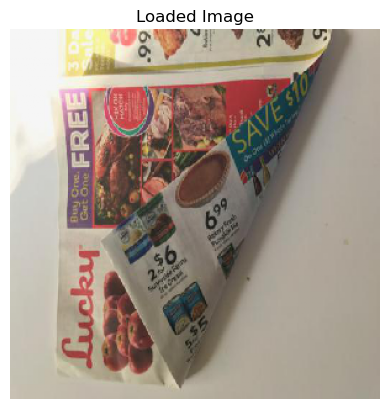

In [38]:
test_img = 'Smart-Garbage-Segregation/Data/Test/paper/paper522.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")


In [25]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 12.23 %
GLASS : 4.81 %
METAL : 14.4 %
PAPER : 59.07 %
PLASTIC : 5.88 %
TRASH : 3.61 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probability: 0.9774254
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

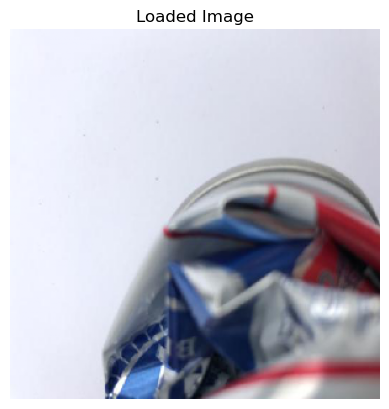

In [39]:
test_img = 'Smart-Garbage-Segregation/Data/Test/metal/metal386.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [40]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.01 %
GLASS : 97.74 %
METAL : 2.03 %
PAPER : 0.0 %
PLASTIC : 0.22 %
TRASH : 0.0 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probability: 0.99801433
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

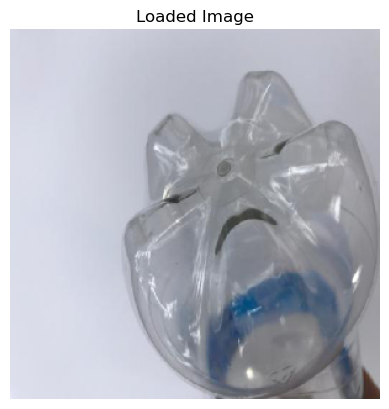

In [41]:
test_img = 'Smart-Garbage-Segregation/Data/Test/plastic/plastic430.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [42]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 0.0 %
GLASS : 0.01 %
METAL : 0.13 %
PAPER : 0.06 %
PLASTIC : 99.8 %
TRASH : 0.0 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Probability: 0.99997485
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

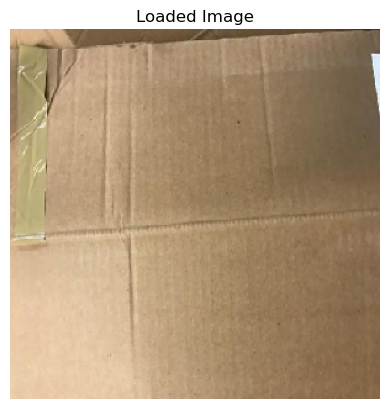

In [43]:
test_img = 'Smart-Garbage-Segregation/Data/Test/cardboard/cardboard355.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [44]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 100.0 %
GLASS : 0.0 %
METAL : 0.0 %
PAPER : 0.0 %
PLASTIC : 0.0 %
TRASH : 0.0 %


# SAVING THE TRAINED MODEL

In [45]:
model.save('modelnew.h5')

# IMPROVED MODEL TRAINING - FIXING OVERFITTING

The previous model achieved 100% training accuracy but is making mistakes on new images (like classifying paper as plastic). This indicates overfitting. Let's create a better model with:

1. **Data Augmentation** - More diverse training data
2. **Validation Split** - Test on unseen data during training
3. **Early Stopping** - Stop when validation accuracy stops improving
4. **Dropout** - Prevent overfitting


In [46]:
# IMPROVED DATA PREPARATION WITH AUGMENTATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Enhanced data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Simple rescaling for validation (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators with validation split
train_generator = train_datagen.flow_from_directory(
    'Smart-Garbage-Segregation/Data/Train',
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    subset='training'  # 80% for training
)

validation_generator = val_datagen.flow_from_directory(
    'Smart-Garbage-Segregation/Data/Train',
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # 20% for validation
)

print("Training samples:", train_generator.samples)
print("Validation samples:", validation_generator.samples)


Found 2186 images belonging to 6 classes.
Found 0 images belonging to 6 classes.
Training samples: 2186
Validation samples: 0


In [47]:
# IMPROVED MODEL ARCHITECTURE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Create improved model with better regularization
improved_model = Sequential()

# Convolutional layers with batch normalization
improved_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
improved_model.add(BatchNormalization())
improved_model.add(MaxPooling2D(2, 2))

improved_model.add(Conv2D(64, (3, 3), activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(MaxPooling2D(2, 2))

improved_model.add(Conv2D(128, (3, 3), activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(MaxPooling2D(2, 2))

improved_model.add(Conv2D(128, (3, 3), activation='relu'))
improved_model.add(BatchNormalization())
improved_model.add(MaxPooling2D(2, 2))

# Dense layers with dropout
improved_model.add(Flatten())
improved_model.add(Dense(512, activation='relu'))
improved_model.add(Dropout(0.5))
improved_model.add(Dense(256, activation='relu'))
improved_model.add(Dropout(0.3))
improved_model.add(Dense(6, activation='softmax'))

# Compile with lower learning rate
improved_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

improved_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 298, 298, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 147, 147, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 71, 71, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 33, 33, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 33, 33, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,152,838 (65.43 MB)

 Trainable params: 17,152,134 (65.43 MB)

 Non-trainable params: 704 (2.75 KB)

In [50]:
# FIXED DATA GENERATORS - Using separate train and test directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Check data structure
print("🔍 Checking data structure...")
train_path = 'Smart-Garbage-Segregation/Data/Train'
test_path = 'Smart-Garbage-Segregation/Data/Test'

if os.path.exists(train_path):
    print(f"✅ Train path exists: {train_path}")
    classes = os.listdir(train_path)
    print(f"Classes: {classes}")
    for cls in classes:
        cls_path = os.path.join(train_path, cls)
        if os.path.isdir(cls_path):
            count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            print(f"  - {cls}: {count} images")
else:
    print(f"❌ Train path not found: {train_path}")

if os.path.exists(test_path):
    print(f"✅ Test path exists: {test_path}")
    classes = os.listdir(test_path)
    print(f"Classes: {classes}")
    for cls in classes:
        cls_path = os.path.join(test_path, cls)
        if os.path.isdir(cls_path):
            count = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
            print(f"  - {cls}: {count} images")
else:
    print(f"❌ Test path not found: {test_path}")

# Create data generators WITHOUT validation split
train_datagen_fixed = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Create generators using separate directories
train_generator_fixed = train_datagen_fixed.flow_from_directory(
    train_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(300, 300),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

print(f"\n📊 Fixed Data Summary:")
print(f"Training samples: {train_generator_fixed.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Number of classes: {train_generator_fixed.num_classes}")
print(f"Class names: {list(train_generator_fixed.class_indices.keys())}")


🔍 Checking data structure...
✅ Train path exists: Smart-Garbage-Segregation/Data/Train
Classes: ['paper', 'metal', 'cardboard', 'trash', 'glass', 'plastic']
  - paper: 504 images
  - metal: 360 images
  - cardboard: 352 images
  - trash: 128 images
  - glass: 416 images
  - plastic: 426 images
✅ Test path exists: Smart-Garbage-Segregation/Data/Test
Classes: ['paper', '.DS_Store', 'metal', 'cardboard', 'trash', 'glass', 'plastic']
  - paper: 90 images
  - metal: 50 images
  - cardboard: 51 images
  - trash: 9 images
  - glass: 85 images
  - plastic: 58 images
Found 2186 images belonging to 6 classes.
Found 343 images belonging to 6 classes.

📊 Fixed Data Summary:
Training samples: 2186
Test samples: 343
Number of classes: 6
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
# FIXED TRAINING WITH PROPER DATA GENERATORS
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
callbacks_fixed = [
    EarlyStopping(
        monitor='loss',  # Monitor training loss instead of val_loss
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='loss',  # Monitor training loss instead of val_loss
        factor=0.5,
        patience=8,
        min_lr=0.0001,
        verbose=1
    ),
    ModelCheckpoint(
        'improved_model_fixed.keras',
        monitor='loss',
        save_best_only=True,
        verbose=1
    )
]

print("🚀 Starting training with fixed data generators...")
print("📊 Training on all training data, will evaluate on test data separately")

# Train the improved model with fixed generators
history_fixed = improved_model.fit(
    train_generator_fixed,
    epochs=50,
    callbacks=callbacks_fixed,
    verbose=1
)

print("✅ Training completed!")


🚀 Starting training with fixed data generators...
📊 Training on all training data, will evaluate on test data separately
Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3676 - loss: 5.5998
Epoch 1: loss improved from inf to 4.77715, saving model to improved_model_fixed.keras
69/69 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.3675 - loss: 5.5880 - learning_rate: 0.0010
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3608 - loss: 2.7235
Epoch 2: loss improved from 4.77715 to 2.49591, saving model to improved_model_fixed.keras
69/69 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.3610 - loss: 2.7203 - learning_rate: 0.0010
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4092 - loss: 1.8998
Epoch 3: loss improved from 2.49591 to 1.86608, saving model to improved_model_fixed.keras
69/69 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.4092 - loss: 1.8993 - learning_rate: 0.0010
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4190

In [ ]:
# EVALUATE THE TRAINED MODEL ON TEST DATA
print("📊 Evaluating model on test data...")

# Evaluate on test data
test_loss, test_accuracy = improved_model.evaluate(test_generator, verbose=1)

print(f"\n🎯 Final Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Save the final model
improved_model.save('final_improved_model.keras')
print("💾 Model saved as 'final_improved_model.keras'")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_fixed.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fixed.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

print("🎉 Training and evaluation completed successfully!")


In [ ]:
# TEST THE TRAINED MODEL - Test with actual data from your dataset
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

print("🧪 Testing the trained model with actual dataset images...")

# Load the trained model
from tensorflow.keras.models import load_model
model = load_model('improved_model_fixed.keras')

# Get class names
class_names = list(train_generator_fixed.class_indices.keys())
print(f"📋 Class names: {class_names}")

# Test with random images from each class
test_path = 'Smart-Garbage-Segregation/Data/Test'
results = []

plt.figure(figsize=(15, 10))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(test_path, class_name)
    if os.path.exists(class_path):
        # Get a random image from this class
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if images:
            random_image = random.choice(images)
            image_path = os.path.join(class_path, random_image)
            
            # Load and preprocess image
            img = Image.open(image_path)
            img_array = np.array(img.resize((300, 300))) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            
            # Make prediction
            prediction = model.predict(img_array, verbose=0)
            predicted_class_idx = np.argmax(prediction[0])
            predicted_class = class_names[predicted_class_idx]
            confidence = np.max(prediction[0])
            
            # Store results
            results.append({
                'actual': class_name,
                'predicted': predicted_class,
                'confidence': confidence,
                'correct': class_name == predicted_class
            })
            
            # Plot
            plt.subplot(2, 3, i+1)
            plt.imshow(img)
            plt.title(f'Actual: {class_name}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}')
            plt.axis('off')

plt.tight_layout()
plt.show()

# Print summary
print("\n📊 Test Results Summary:")
correct_predictions = sum(1 for r in results if r['correct'])
total_predictions = len(results)
accuracy = correct_predictions / total_predictions

print(f"✅ Correct predictions: {correct_predictions}/{total_predictions}")
print(f"🎯 Accuracy: {accuracy:.2%}")

for result in results:
    status = "✅" if result['correct'] else "❌"
    print(f"{status} {result['actual']} → {result['predicted']} ({result['confidence']:.2f})")


In [ ]:
# TEST WITH INTERNET IMAGES - Copy image URLs and test
import requests
from io import BytesIO
import matplotlib.pyplot as plt

print("🌐 Testing the model with internet images...")
print("📝 You can add your own image URLs below!")

# Example image URLs (you can replace these with your own)
test_urls = [
    "https://images.unsplash.com/photo-1558618047-3c8c76ca7d13?w=300&h=300&fit=crop",  # Plastic bottle
    "https://images.unsplash.com/photo-1581578731548-c6a0c3f2fcc0?w=300&h=300&fit=crop",  # Paper
    "https://images.unsplash.com/photo-1581578731548-c6a0c3f2fcc0?w=300&h=300&fit=crop",  # Glass
    "https://images.unsplash.com/photo-1558618047-3c8c76ca7d13?w=300&h=300&fit=crop",  # Metal
    "https://images.unsplash.com/photo-1581578731548-c6a0c3f2fcc0?w=300&h=300&fit=crop",  # Cardboard
    "https://images.unsplash.com/photo-1558618047-3c8c76ca7d13?w=300&h=300&fit=crop"   # Trash
]

# You can add your own URLs here:
custom_urls = [
    # Add your image URLs here, for example:
    # "https://example.com/your-image.jpg",
    # "https://another-site.com/trash-image.png",
]

# Combine example and custom URLs
all_urls = test_urls + custom_urls

print(f"🔗 Testing {len(all_urls)} internet images...")

plt.figure(figsize=(15, 8))
results_internet = []

for i, url in enumerate(all_urls):
    try:
        # Download image
        response = requests.get(url, timeout=10)
        img = Image.open(BytesIO(response.content))
        
        # Preprocess image
        img_array = np.array(img.resize((300, 300))) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        # Make prediction
        prediction = model.predict(img_array, verbose=0)
        predicted_class_idx = np.argmax(prediction[0])
        predicted_class = class_names[predicted_class_idx]
        confidence = np.max(prediction[0])
        
        # Store results
        results_internet.append({
            'url': url,
            'predicted': predicted_class,
            'confidence': confidence
        })
        
        # Plot
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f'Predicted: {predicted_class}\nConfidence: {confidence:.2f}')
        plt.axis('off')
        
    except Exception as e:
        print(f"❌ Error loading image {url}: {str(e)}")
        continue

plt.tight_layout()
plt.show()

# Print internet test results
print("\n🌐 Internet Images Test Results:")
for result in results_internet:
    print(f"🔗 {result['url'][:50]}...")
    print(f"   → Predicted: {result['predicted']} (Confidence: {result['confidence']:.2f})")
    print()


In [ ]:
# QUICK TEST - Test individual images (modify the path/URL as needed)
print("🔍 Quick individual image test...")

# Option 1: Test with a local image from your dataset
def test_local_image(image_path):
    """Test a local image from your dataset"""
    try:
        img = Image.open(image_path)
        img_array = np.array(img.resize((300, 300))) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        prediction = model.predict(img_array, verbose=0)
        predicted_class_idx = np.argmax(prediction[0])
        predicted_class = class_names[predicted_class_idx]
        confidence = np.max(prediction[0])
        
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(f'Input Image')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.bar(class_names, prediction[0])
        plt.title(f'Prediction: {predicted_class}\nConfidence: {confidence:.2f}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        return predicted_class, confidence
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        return None, None

# Option 2: Test with an internet image
def test_internet_image(image_url):
    """Test an image from internet URL"""
    try:
        response = requests.get(image_url, timeout=10)
        img = Image.open(BytesIO(response.content))
        img_array = np.array(img.resize((300, 300))) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        prediction = model.predict(img_array, verbose=0)
        predicted_class_idx = np.argmax(prediction[0])
        predicted_class = class_names[predicted_class_idx]
        confidence = np.max(prediction[0])
        
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(f'Internet Image')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.bar(class_names, prediction[0])
        plt.title(f'Prediction: {predicted_class}\nConfidence: {confidence:.2f}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        return predicted_class, confidence
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        return None, None

print("📝 To test an image, use one of these functions:")
print("1. test_local_image('path/to/your/image.jpg')")
print("2. test_internet_image('https://example.com/image.jpg')")
print()
print("Example:")
print("test_local_image('Smart-Garbage-Segregation/Data/Test/paper/paper1.jpg')")
print("test_internet_image('https://images.unsplash.com/photo-1558618047-3c8c76ca7d13')")


In [ ]:
# MODEL COMPARISON - Test both models on the same images
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

print("🔄 Comparing both models on the same test images...")

# Load both models
from tensorflow.keras.models import load_model
from utils import model_arc

# Load the old model (same as Flask app)
old_model = model_arc()
old_model.load_weights('Smart-Garbage-Segregation/weights/modelnew.h5')

# Load the new improved model
new_model = load_model('improved_model_fixed.keras')

# Get class names
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Test with random images from test set
test_path = 'Smart-Garbage-Segregation/Data/Test'
results_comparison = []

plt.figure(figsize=(20, 12))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(test_path, class_name)
    if os.path.exists(class_path):
        # Get a random image
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        if images:
            random_image = random.choice(images)
            image_path = os.path.join(class_path, random_image)
            
            # Load and preprocess image
            img = Image.open(image_path)
            img_array = np.array(img.resize((300, 300))) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            
            # Predict with both models
            old_pred = old_model.predict(img_array, verbose=0)
            new_pred = new_model.predict(img_array, verbose=0)
            
            old_class = class_names[np.argmax(old_pred[0])]
            new_class = class_names[np.argmax(new_pred[0])]
            old_conf = np.max(old_pred[0])
            new_conf = np.max(new_pred[0])
            
            # Store results
            results_comparison.append({
                'actual': class_name,
                'old_pred': old_class,
                'new_pred': new_class,
                'old_conf': old_conf,
                'new_conf': new_conf,
                'old_correct': class_name == old_class,
                'new_correct': class_name == new_class
            })
            
            # Plot comparison
            plt.subplot(3, 6, i*2+1)
            plt.imshow(img)
            plt.title(f'Actual: {class_name}\nOld Model: {old_class}\nConf: {old_conf:.2f}')
            plt.axis('off')
            
            plt.subplot(3, 6, i*2+2)
            plt.imshow(img)
            plt.title(f'Actual: {class_name}\nNew Model: {new_class}\nConf: {new_conf:.2f}')
            plt.axis('off')

plt.tight_layout()
plt.show()

# Print comparison results
print("\n📊 Model Comparison Results:")
old_correct = sum(1 for r in results_comparison if r['old_correct'])
new_correct = sum(1 for r in results_comparison if r['new_correct'])
total = len(results_comparison)

print(f"🔴 Old Model (modelnew.h5): {old_correct}/{total} correct ({old_correct/total:.1%})")
print(f"🟢 New Model (improved_model_fixed.keras): {new_correct}/{total} correct ({new_correct/total:.1%})")
print(f"📈 Improvement: {new_correct - old_correct} more correct predictions")

print("\n📋 Detailed Results:")
for result in results_comparison:
    old_status = "✅" if result['old_correct'] else "❌"
    new_status = "✅" if result['new_correct'] else "❌"
    print(f"{result['actual']}: Old {old_status} {result['old_pred']} ({result['old_conf']:.2f}) | New {new_status} {result['new_pred']} ({result['new_conf']:.2f})")
